In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=6a778796f06b13876af1753f3a24ebfce08b99c5d314d2e72b091f4a7545bab3
  Stored in directory: /tmp/pip-ephem-wheel-cache-fyn2gkq3/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Spam Emails Detection NLP

## Abstarct
- This project is to use the automated classification method of Natural Language Processing to extract relevant information such as entities, keywords and sentiments from emails for the detection of spams, spam filtering, profanity detection.

- The target variable for this dataset is "spam" in which a spam email is mapped to "1" and anyting else is mapped to "0". The target variable can thought of what will be detected. The valua of this variable will be modelled and predicted by other variables.

- This is a binary classification problem analysis by using the Nature Language Processing to detect unsolicited and unwanted emails. The model created in this project should be able to prevent spam emails from creeping into the user's inbox, thereby improving user experience and protectin priavacy so that increacing organizations bebefit.


## Business Introduction

Spam emails can be costly to both individuals and organizations. To effectively handle the threats posted by spam emails, there are huge demand for effective spam detection from machine learning techniques. This project will practice several kinds of NLP models to find out the most effective and accurate ones. 

## Problem Statement
BY the end of this project, it could be able to solve the following busiss problems:

- Obtain a general data informatiom
- Practice different kind of Text Pro


## Data set information

The original dataset is from the opensource "Spambase.data"of the UCI machine learning respository(https://archive.ics.uci.edu/ml/datasets/spambase). It contains 5569 emails with 745 spam emails. However this project will use the "emails" dataset from Kaggle, of which the imbalnced target classification has been treated(https://www.kaggle.com/karthickveerakumar/spam-filter)


In [8]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [9]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

import re



## Import dataset and Data Exploration

[Source:](https://www.kaggle.com/karthickveerakumar/spam-filter)

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [10]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
import pandas as pd
import io
emails = pd.read_csv(io.BytesIO(uploaded[emails.csv]))

NameError: ignored

In [ ]:
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo ...,1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or ...,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended t...",1
3,Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 33...,1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death...",1


In [ ]:
emails.tail()

,text,spam
5723,Subject: re : research and development charges to gpg here it is ! - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 08 / 14 / 2000 07 : 47 am - - - - - -...,0
5724,"Subject: re : receipts from visit jim , thanks again for the invitation to visit lsu . shirley will fedex the receipts tomorrow . vince "" james r . garven "" on 02 / 08 / 2000 07 : 00 : 50 pm ...",0
5725,Subject: re : enron case study update wow ! all on the same day . that ' s super . thank you so very much . vince is coming up to baylor on monday of next week and we will hash out our question...,0
5726,"Subject: re : interest david , please , call shirley crenshaw ( my assistant ) , extension 5 - 5290 to set it up . vince david p dupre 06 / 15 / 2000 05 : 18 pm to : vince j kaminski / hou ...",0
5727,"Subject: news : aurora 5 . 2 update aurora version 5 . 2 - the fastest model just got faster - epis announces the release of aurora , version 5 . 2 aurora the electric market price forecasting...",0


In [ ]:
emails.dtypes


text    object
spam     int64
dtype: object

In [ ]:
emails.isnull().sum() # check if there is any missing observation.

text    0
spam    0
dtype: int64

In [ ]:
emails['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

### Visulazaion of the volums of spam emails and none spam emails

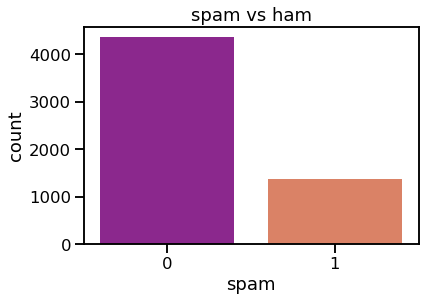

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(emails['spam'], palette="plasma")
plt.title('spam vs ham');


#### Randomly select a text to have a look. 

In [ ]:
emails['text'][1]

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [ ]:
emails["text"][1368]

'Subject: hello guys ,  i \' m " bugging you " for your completed questionnaire and for a one - page  bio / statement on your thoughts on " business edu and the new economy " . if  my records are incorrect please re - ship your responses to me . i want to  put everything together next week so that i can ship it back to everyone .  the questionnaire is attached as well as copies of the bio pages for  michael froehls and myself ( two somewhat different approaches ) . the idea  of the latter is just to introduce yourself to the other panelists and give  them some background on how you are approaching the issues we will discuss .  we will also provide copies to the attendees and use this material for our  personal introductions at the opening of the panel discussions .  thanks and i look forward to seeing you in two weeks .  john  - waco _ background _ mf . doc  - jmartinbiosketch . doc  - questionnaire . doc  john d . martin  carr p . collins chair in finance  finance department  baylor u

### Make word cloud to compare the spam emails and non spam emails

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

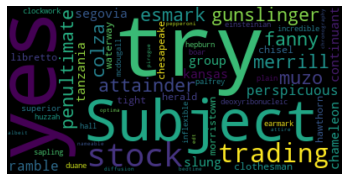

In [ ]:
spam_sample = emails['text'][1]
wordcloud = WordCloud().generate(spam_sample)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

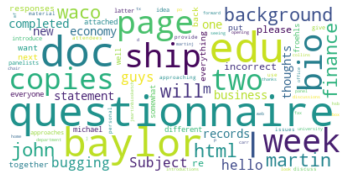

In [ ]:
ham = emails['text'][1368]
wordcloud = WordCloud().generate(ham)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(ham)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Make two subset filter by "spam" or "ham"

In [ ]:
spamdf = emails[emails['spam']== 1]
spamdf.shape

(1368, 2)

In [ ]:
hamdf = emails[emails["spam"] == 0]

hamdf.shape

(4360, 2)

In [ ]:
X_spam= np.array(spamdf['text'])
X_ham = np.array(hamdf['text'])

In [ ]:
doc_spam = np.array_str(X_spam)
doc_ham = np.array_str(X_ham)

In [ ]:
type(doc_spam)

str

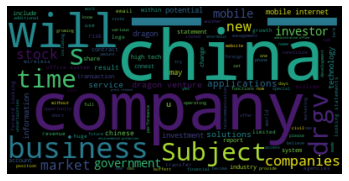

In [ ]:
wordcloud = WordCloud().generate(doc_spam)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

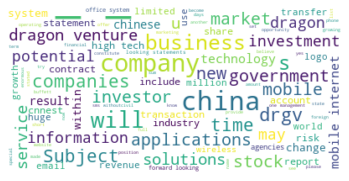

In [ ]:
wordcloud = WordCloud().generate(doc_spam)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(doc_spam)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Text Pre_processing

### Simple text-processing

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeanbai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)


## Split emails dataset into to train/ test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= np.array(emails['text'])
y = np.array(emails['spam'])

In [ ]:
type(X)

numpy.ndarray

In [ ]:
norm_X = normalize_corpus(X)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(norm_X,y,test_size = 0.3,random_state=123)

In [ ]:
X_train[0]

'subject ees interest rate hedge vince - osman asked forward copy memo . hope speak tomorrow bring original approval . regards , dave foti'

### Make Bag of Words Model

Text processing, tokenizing and stopwords are all included in sklearn CountVectorizer.

Fit vectorize to the data(build a vocabulary, count the number of words). then transform the original text to vector

### Bag of Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_train_matrix = cv.fit_transform(X_train)
cv_test_matrix = cv.fit_transform(X_test)
cv_train_matrix = cv_train_matrix.toarray()
cv_test_matrix = cv_test_matrix.toarray()
cv_train_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 9, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
len(vocab)

19823

### TF-IDF Model

#### Process vectorization and Tfidf by using one line of coding

Convert a collection of raw documents to a matrix of TF-IDF features.
Equivalent to CountVectorizer followed by TfidfTransformer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_train_matrix = tv.fit_transform(X_train)
tv_train_matrix = tv_train_matrix.toarray()

tv_test_matrix = tv.fit_transform(X_test)
tv_test_matrix = tv_test_matrix.toarray()

vocab = tv.get_feature_names()
#pd.DataFrame(np.round(tv_train_matrix, 2), columns=vocab)
len(vocab)

19823

In [ ]:
tv_train_matrix.shape

(4009, 32265)

In [ ]:
tv_X_test.shape

(1719, 19823)

### Document Similarity

Use similarity metric, cosine similarity and compare pairwise document similarity based on their TF-IDF feature vectors

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_train = cosine_similarity(tv_X_train)

similarity_df_train = pd.DataFrame(similarity_matrix)
similarity_df_train

,0,1,2,3,4,5,6,7,8,9,...,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718
0,1.000000,0.016901,0.020936,0.008903,0.017943,0.000873,0.018636,0.000546,0.015945,0.004657,...,0.010500,0.000215,0.019861,0.002176,0.011377,0.008400,0.003156,0.008544,0.000998,0.004958
1,0.016901,1.000000,0.039652,0.000904,0.014700,0.001236,0.008843,0.016098,0.045265,0.026704,...,0.024169,0.000304,0.058674,0.000573,0.042169,0.001172,0.015946,0.035987,0.001413,0.021358
2,0.020936,0.039652,1.000000,0.010260,0.024890,0.010528,0.025443,0.028838,0.053805,0.018316,...,0.056861,0.003826,0.035735,0.002412,0.051590,0.029161,0.019589,0.027766,0.010504,0.072699
3,0.008903,0.000904,0.010260,1.000000,0.005180,0.000964,0.006253,0.000603,0.007389,0.013951,...,0.011736,0.006051,0.001215,0.000447,0.000586,0.000914,0.020071,0.012937,0.001102,0.018917
4,0.017943,0.014700,0.024890,0.005180,1.000000,0.010079,0.044638,0.000569,0.009448,0.034502,...,0.022306,0.004901,0.010016,0.009752,0.006443,0.015823,0.012535,0.049177,0.001039,0.037797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,0.008400,0.001172,0.029161,0.000914,0.015823,0.001249,0.028606,0.000782,0.025506,0.001240,...,0.018997,0.000307,0.001575,0.017199,0.004646,1.000000,0.000660,0.004659,0.041138,0.074392
1715,0.003156,0.015946,0.019589,0.020071,0.012535,0.008967,0.008920,0.004130,0.008704,0.000691,...,0.050231,0.007074,0.004860,0.010335,0.010962,0.000660,1.000000,0.015044,0.011783,0.031513
1716,0.008544,0.035987,0.027766,0.012937,0.049177,0.005660,0.011303,0.005702,0.007564,0.003479,...,0.037022,0.002935,0.030552,0.009710,0.020126,0.004659,0.015044,1.000000,0.000211,0.026570
1717,0.000998,0.001413,0.010504,0.001102,0.001039,0.048798,0.029328,0.000943,0.006636,0.001495,...,0.000885,0.015113,0.001899,0.020115,0.002733,0.041138,0.011783,0.000211,1.000000,0.001348


In [ ]:
similarity_matrix_test = cosine_similarity(tv_X_test)

similarity_df_test = pd.DataFrame(similarity_matrix_test)
similarity_df_test.shape

(1719, 1719)

### Document Clustering with Similarity Features

There are two types of hierarchical clustering algorithms namely, agglomerative and divisive methods. I will be using a agglomerative clustering algorithm, which is hierarchical clustering using a bottom up approach i.e. each observation or document starts in its own cluster and clusters are successively merged together using a distance metric which measures distances between data points and a linkage merge criterion. Will use the Ward method to govern the mergo strategy.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix_train, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')


,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,16,2837,0,2
1,1546,3635,0,2
2,103,3767,0,2
3,638,3175,0,2
4,7,3182,0,2
...,...,...,...,...
4003,8010,8011,32.1475,1926
4004,8007,8012,36.792,2008
4005,7990,8009,40.3173,979
4006,8008,8013,41.8406,3030


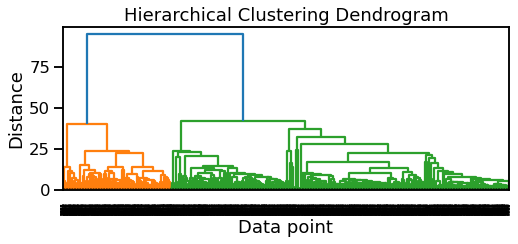

In [ ]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

### Topic Models

Use Latent Dirichlet Allocation (LDA),which uses a generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=0)
dt_matrix = lda.fit_transform(tv_train_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features


,T1,T2,T3
0,0.064852,0.870698,0.064451
1,0.067372,0.875788,0.056840
2,0.041734,0.916675,0.041591
3,0.062013,0.876179,0.061807
4,0.291069,0.671236,0.037695
...,...,...,...
4004,0.036065,0.927994,0.035941
4005,0.022492,0.955227,0.022282
4006,0.532351,0.402626,0.065023
4007,0.085910,0.827922,0.086168


In [ ]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic[0:10])
    

[('favorite', 12.868203125438566), ('creditdotcom', 12.819947005512486), ('driver', 12.290189429001511), ('transit', 10.901290848416235), ('throat', 10.703009112575172), ('reliaquote', 9.747905274507731), ('37296', 8.685832582561678), ('4753', 8.324105926585053), ('speedwell', 8.199337174308107), ('amex', 8.107299109771061)]
[('listen', 174.60298917381627), ('maubev', 163.7012999790825), ('regurgitate', 87.29557716848583), ('flores', 81.88259099221621), ('364463', 81.10222133742056), ('squabbling', 80.46938527152857), ('enjoybestones', 58.59732105723692), ('367', 57.83439857915721), ('studiuja', 52.86030481076926), ('prescriptions', 50.47952187620387)]
[('awakening', 12.034426547205378), ('transit', 5.6531585793240495), ('trails', 5.561747838018867), ('371', 4.931908577845254), ('quota', 4.80967965500536), ('waived', 4.455407221384782), ('try', 4.300609844064621), ('les', 4.265551672504797), ('memorial', 4.252376236439158), ('webcam', 4.176057929462157)]


### Document Clustering with Topic Model Features

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([emails, cluster_labels], axis=1)

,text,spam,Topic,ClusterLabel
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a compan...,1,2,0.0
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penulti...,1,2,0.0
2,Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been...,1,0,0.0
3,Subject: 4 color printing special request additional information now ! click here click here f...,1,0,0.0
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' ...",1,0,0.0
...,...,...,...,...
5723,Subject: re : research and development charges to gpg here it is ! - - - - - - - - - - - - - -...,0,1,NaN
5724,"Subject: re : receipts from visit jim , thanks again for the invitation to visit lsu . shirle...",0,1,NaN
5725,Subject: re : enron case study update wow ! all on the same day . that ' s super . thank you so...,0,1,NaN
5726,"Subject: re : interest david , please , call shirley crenshaw ( my assistant ) , extension 5 ...",0,1,NaN


#### Use the CountVectorizer treat the all text of emails dataset to view top 10 words for each topic

In [ ]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [ ]:
len(cv.get_feature_names())

19968

In [ ]:
dtm = cv.fit_transform(emails['text'])

In [ ]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=0)

In [ ]:
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['money', 'free', 'mail', 'time', 'market', '000', 'www', 'email', 'http', 'business', 'new', 'company', 'power', 'information', 'com']


THE TOP 15 WORDS FOR TOPIC #1
['know', 'research', 'thanks', 'edu', 'shirley', 'hou', '2001', 'cc', 'pm', 'ect', '2000', 'com', 'kaminski', 'vince', 'enron']


THE TOP 15 WORDS FOR TOPIC #2
['pm', 'thanks', 'corp', 'development', 'research', 'group', 'kaminski', 'risk', 'model', '2000', 'cc', 'vince', 'hou', 'enron', 'ect']




In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [ ]:
len(stop_words)

179

In [ ]:
#nlp.Defaults.stop_words.add("000")

#nlp.Defaults.stop_words.add("www")
#nlp.Defaults.stop_words.add("http")
#nlp.Defaults.stop_words.add("cc")
#nlp.Defaults.stop_words.add("com")
#nlp.Defaults.stop_words.add("etc")


Attaching Discovered Topic Labels to Original Articles

In [ ]:
topic_results = lda.transform(dtm)

In [ ]:
topic_results.shape

(5728, 3)

In [ ]:
topic_results[0]

array([0.00414872, 0.00346281, 0.99238848])

In [ ]:
topic_results[0].round(2)

array([0.  , 0.  , 0.99])

In [ ]:
topic_results[0].argmax()

2

In [ ]:
topic_results.argmax(axis=1)

array([2, 2, 0, ..., 1, 1, 0])

In [ ]:
emails['Topic'] = topic_results.argmax(axis=1)

In [ ]:
emails.head(10)

,text,spam,Topic
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a compan...,1,2
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penulti...,1,2
2,Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been...,1,0
3,Subject: 4 color printing special request additional information now ! click here click here f...,1,0
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' ...",1,0
5,"Subject: great nnews hello , welcome to medzonline sh groundsel op we are pleased to introduce...",1,0
6,Subject: here ' s a hot play in motion homeland security investments the terror attacks on the...,1,0
7,Subject: save your money buy getting this thing here you have not tried cialls yet ? than you ...,1,0
8,Subject: undeliverable : home based business for grownups your message subject : home based bu...,1,1
9,Subject: save your money buy getting this thing here you have not tried cialls yet ? than you ...,1,0


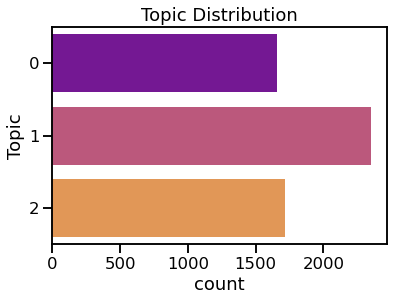

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(y=emails['Topic'], palette="plasma")
plt.title('Topic Distribution');

In [ ]:
import random
for i in range(6):
    random_word_id = random.randint(0,12300)
    print(cv.get_feature_names()[random_word_id])

enerfax
civilian
idp
aggressively
escondido
eafrank


Use the components index to find a single topic for each array as an example

In [ ]:
single_topic = lda.components_[2]

In [ ]:
single_topic.argsort()

array([18018,  8986, 13564, ...,  9298,  7126,  6756])

In [ ]:
single_topic[100]
#Top 10 words for this topic at the number 1055 email.

single_topic.argsort()[-10:]

top_word_indices = single_topic.argsort()[-10:]
#Get the text information of this top 10 words

for index in top_word_indices:
    print(cv.get_feature_names()[index])

group
kaminski
risk
model
2000
cc
vince
hou
enron
ect


In [ ]:
emails["spam"][100]

1


## Deep learning Methods

### Implementing a word2vec model using a CBOW (Continuous Bag of Words) neural network architecture


#### Build the corpus vocabulary( use the normolize X matrix previously)

In [ ]:
norm_X.shape

(5728,)

In [ ]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_X)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_X]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 37203
Vocabulary Sample: [('enron', 1), ('ect', 2), ("'", 3), ('subject', 4), ('vince', 5), ('hou', 6), ('com', 7), ('please', 8), ('2000', 9), ('kaminski', 10)]


### Build (context_words, target_word) pair generator

In [ ]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [ ]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['subject', 'naturally', 'corporate', 'identity'] -> Target (Y): irresistible
Context (X): ['naturally', 'irresistible', 'identity', 'lt'] -> Target (Y): corporate
Context (X): ['irresistible', 'corporate', 'lt', 'really'] -> Target (Y): identity
Context (X): ['corporate', 'identity', 'really', 'hard'] -> Target (Y): lt
Context (X): ['identity', 'lt', 'hard', 'recollect'] -> Target (Y): really
Context (X): ['lt', 'really', 'recollect', 'company'] -> Target (Y): hard
Context (X): ['really', 'hard', 'company', 'market'] -> Target (Y): recollect
Context (X): ['hard', 'recollect', 'market', 'full'] -> Target (Y): company
Context (X): ['recollect', 'company', 'full', 'suqgestions'] -> Target (Y): market
Context (X): ['company', 'market', 'suqgestions', 'information'] -> Target (Y): full
Context (X): ['market', 'full', 'information', 'isoverwhelminq'] -> Target (Y): suqgestions


### Build CBOW Deep Network Model

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 100)            3720300   
_________________________________________________________________
lambda_2 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 37203)             3757503   
Total params: 7,477,803
Trainable params: 7,477,803
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#for epoch in range(1, 5):
    #loss = 0.
    #i = 0
    #for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        #i += 1
        #loss += cbow.train_on_batch(x, y)
        #if i % 100000 == 0:
            #print('Processed {} (context, word) pairs'.format(i))

    #print('Epoch:', epoch, '\tLoss:', loss)
    #print()

### Get Word Embeddings

## Unsupervised NLP

Using spaCy to do data exploration

In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [ ]:
emails.head()

In [ ]:
#len(nlp.Defaults.stop_words)

In [ ]:
#nlp.Defaults.stop_words.add("000")

#nlp.Defaults.stop_words.add("www")
#nlp.Defaults.stop_words.add("http")
#nlp.Defaults.stop_words.add("cc")
#nlp.Defaults.stop_words.add("com")
#nlp.Defaults.stop_words.add("etc")